# Import Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.preprocessing import MinMaxScaler

# Import Dataset

In [ ]:
dataset = pd.read_csv("Automobile.csv")

In [18]:
dataset.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [38]:
dataset.tail()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa
397,chevy s-10,31.0,4,119.0,82.0,2720,19.4,82,usa


# Data Preprocess

In [8]:
dataset.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [20]:
dataset_horsepower=dataset.reset_index()['horsepower']

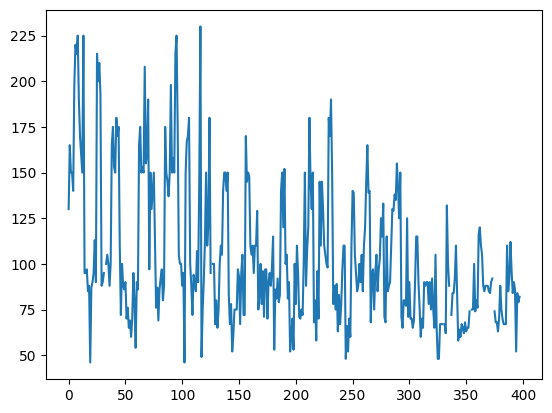

In [21]:
plt.plot(dataset_horsepower)

In [96]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset_horsepower = scaler.fit_transform(np.array(dataset_horsepower).reshape(-1,1))
dataset_horsepower

array([[0.45652174],
       [0.64673913],
       [0.56521739],
       [0.56521739],
       [0.51086957],
       [0.82608696],
       [0.94565217],
       [0.91847826],
       [0.97282609],
       [0.7826087 ],
       [0.67391304],
       [0.61956522],
       [0.56521739],
       [0.97282609],
       [0.26630435],
       [0.26630435],
       [0.27717391],
       [0.21195652],
       [0.22826087],
       [0.        ],
       [0.22282609],
       [0.23913043],
       [0.26630435],
       [0.36413043],
       [0.23913043],
       [0.91847826],
       [0.83695652],
       [0.89130435],
       [0.79891304],
       [0.22826087],
       [0.23913043],
       [0.26630435],
       [       nan],
       [0.29347826],
       [0.32065217],
       [0.29347826],
       [0.22826087],
       [0.29347826],
       [0.64673913],
       [0.70108696],
       [0.58152174],
       [0.56521739],
       [0.72826087],
       [0.67391304],
       [0.70108696],
       [0.34782609],
       [0.14130435],
       [0.293

# Train Test Split Dataset

In [34]:
training_size = int(len(dataset_horsepower) * 0.75)
test_size = len(dataset_horsepower) - training_size
train_data, test_data = dataset_horsepower[0:training_size,:], dataset_horsepower[training_size:len(dataset_horsepower),:1]

In [35]:
training_size,test_size

(298, 100)

In [37]:
def create_dataset(dataset, time_step = 1):
 dataX, dataY = [], []
 for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [98]:
time_step = 60
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# Reshaping Model

In [53]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [54]:
print(x_train.shape), print(y_train.shape)

(1, 10, 1)
(1,)


(None, None)

In [55]:
print(x_test.shape), print(y_test.shape)

(1, 10, 1)
(1,)


(None, None)

# Creating LSTM Model

In [74]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(30, return_sequences = False))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [76]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_14 (LSTM)              (None, 30)                9720      
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 20,151
Trainable params: 20,151
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(x_train, y_train, epochs=20, batch_size=64)

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: nan
Epoch 2/20
1/1 [==============================] - 0s 29ms/step - loss: nan
Epoch 3/20
1/1 [==============================] - 0s 31ms/step - loss: nan
Epoch 4/20
1/1 [==============================] - 0s 31ms/step - loss: nan
Epoch 5/20
1/1 [==============================] - 0s 30ms/step - loss: nan
Epoch 6/20
1/1 [==============================] - 0s 31ms/step - loss: nan
Epoch 7/20
1/1 [==============================] - 0s 32ms/step - loss: nan
Epoch 8/20
1/1 [==============================] - 0s 31ms/step - loss: nan
Epoch 9/20
1/1 [==============================] - 0s 31ms/step - loss: nan
Epoch 10/20
1/1 [==============================] - 0s 30ms/step - loss: nan
Epoch 11/20
1/1 [==============================] - 0s 29ms/step - loss: nan
Epoch 12/20
1/1 [==============================] - 0s 29ms/step - loss: nan
Epoch 13/20
1/1 [==============================] - 0s 30ms/step - loss: nan
Epoch 14/20
1/1 [======

In [79]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 654ms/step


In [82]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

1/1 [==============================] - 0s 27ms/step


In [85]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plot And Visualise

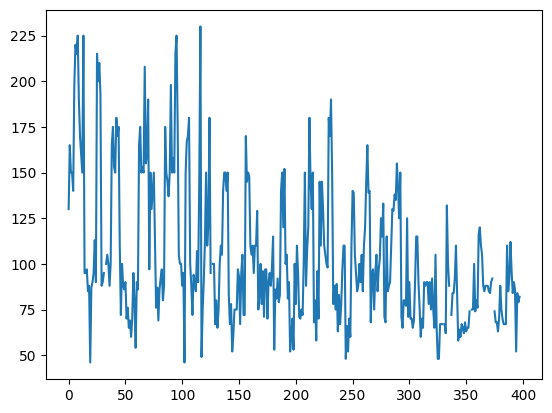

In [93]:
look_back = 100
trainPredictPlot = np.empty_like(dataset_horsepower)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(dataset_horsepower)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(dataset_horsepower) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(dataset_horsepower))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()